# **Filtro Visual : Convoluciones Personalizadas**

**Computación visual**

Gabriela Gallegos Rubio

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, VBox # Seccion interactiva

## Función convolucional

In [11]:
def aplicar_convolucion_manual(img, kernel):
    """
    Aplica un filtro definido por un kernel a una imagen en escala de grises.

    Parámetros:
    - img: imagen de entrada (en escala de grises).
    - kernel: matriz que define el filtro (2D numpy array).

    Retorna:
    - Imagen filtrada por convolución.
    """
    h, w = img.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Añadir bordes para evitar pérdida de información en los extremos
    img_padded = cv2.copyMakeBorder(img, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_REPLICATE)

    # Crear imagen de salida vacía
    output = np.zeros_like(img)

    # Aplicar convolución pixel por pixel
    for i in range(h):
        for j in range(w):
            region = img_padded[i:i+kh, j:j+kw]
            output[i, j] = np.clip(np.sum(region * kernel), 0, 255)

    return output

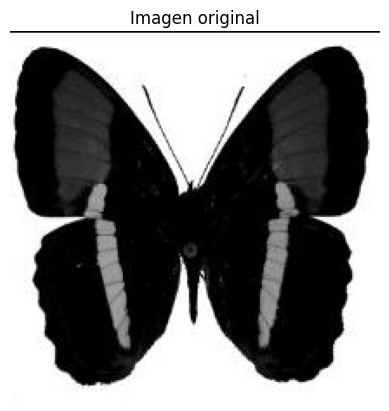

In [12]:
img = cv2.imread('mariposa.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Imagen original")
plt.axis('off')
plt.show()

## Filtros

In [13]:
# Filtro de enfoque (sharpen)
sharpen_kernel = np.array([
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]
])

# Filtro de suavizado (blur)
blur_kernel = np.ones((3, 3), dtype=np.float32) / 9.0

# Filtro de detección de bordes (Sobel horizontal)
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

img_sharpen = aplicar_convolucion_manual(img, sharpen_kernel)
img_blur = aplicar_convolucion_manual(img, blur_kernel)
img_edges = aplicar_convolucion_manual(img, sobel_x)

img_sharpen_cv = cv2.filter2D(img, -1, sharpen_kernel)
img_blur_cv = cv2.filter2D(img, -1, blur_kernel)
img_edges_cv = cv2.filter2D(img, -1, sobel_x)

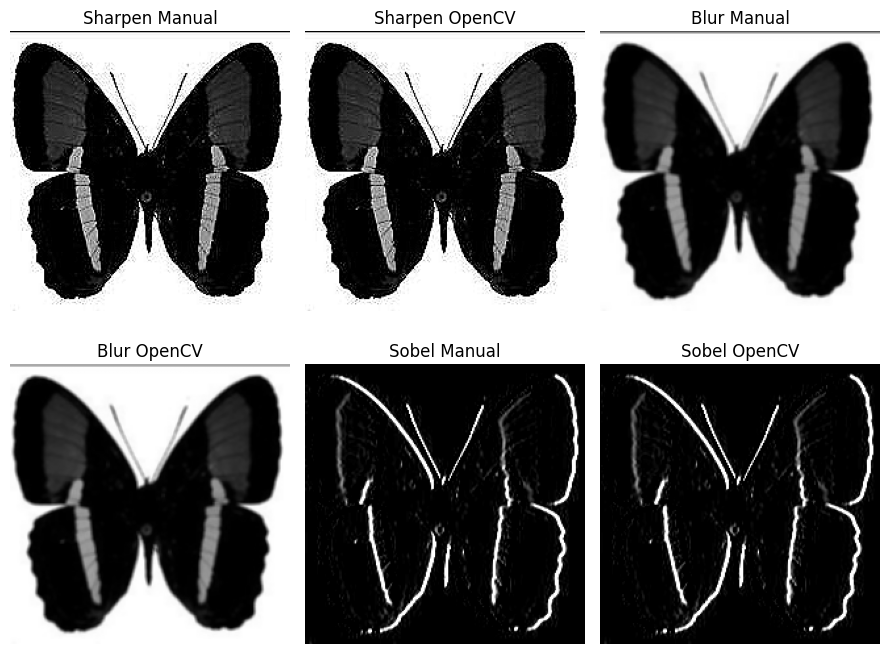

In [14]:
titulos = ['Sharpen Manual', 'Sharpen OpenCV',
           'Blur Manual', 'Blur OpenCV',
           'Sobel Manual', 'Sobel OpenCV']

imagenes = [img_sharpen, img_sharpen_cv,
            img_blur, img_blur_cv,
            img_edges, img_edges_cv]

plt.figure(figsize=(9, 7))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(imagenes[i], cmap='gray')
    plt.title(titulos[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


## Sección interactivo con sliders

In [15]:
# Función para aplicar kernel personalizado
# Crear una interfaz interactiva con sliders (`cv2.createTrackbar`) para probar diferentes valores del kernel.

def aplicar_kernel(k00, k01, k02, k10, k11, k12, k20, k21, k22, divisor):
    kernel = np.array([
        [k00, k01, k02],
        [k10, k11, k12],
        [k20, k21, k22]
    ], dtype=np.float32)

    if divisor == 0:
        divisor = 1
    kernel /= divisor

    resultado = cv2.filter2D(img, -1, kernel)

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(resultado, cmap='gray')
    plt.title("Filtrada")
    plt.axis("off")
    plt.show()

# Sliders para cada valor del kernel + divisor
sliders = [
    IntSlider(min=-10, max=10, value=0, description=f'K{i}') for i in range(9)
] + [IntSlider(min=1, max=20, value=1, description='Div')]

# Mostrar interfaz interactiva
interact(
    aplicar_kernel,
    k00=sliders[0], k01=sliders[1], k02=sliders[2],
    k10=sliders[3], k11=sliders[4], k12=sliders[5],
    k20=sliders[6], k21=sliders[7], k22=sliders[8],
    divisor=sliders[9]
);


interactive(children=(IntSlider(value=0, description='K0', max=10, min=-10), IntSlider(value=0, description='K…